# Практическое занятие 12

## Вариант 11

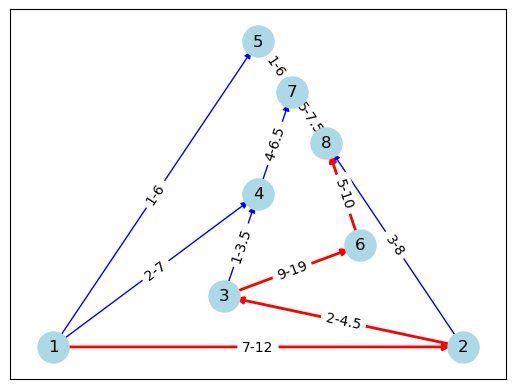

Ранние сроки: {1: 0, 2: 7, 4: 10, 5: 1, 3: 9, 8: 23, 6: 18, 7: 14}
Поздние сроки: {1: 0, 2: 7, 4: 14, 5: 17, 3: 9, 8: 23, 6: 18, 7: 18}
Общая продолжительность проекта: 23
Критический путь: [(1, 2), (2, 3), (3, 6), (6, 8)]


In [23]:
import scipy.stats as stats
import networkx as nx
import matplotlib.pyplot as plt

class NetworkGraph:
    """
    Класс для создания и анализа сетевого графика.
    """
    def __init__(self, edges_data):
        """
        Инициализация сетевого графа с данными о ребрах.

        :param edges_data: Словарь с данными о ребрах. Ключ - кортеж из двух узлов, значение - кортеж (минимальное время, максимальное время).
        """
        self.graph = nx.DiGraph()
        self.add_edges(edges_data)

    def add_edges(self, edges_data):
        """
        Добавление ребер в граф.

        :param edges_data: Словарь с данными о ребрах.
        """
        for edge, time in edges_data.items():
            self.graph.add_edge(*edge, min_time=time[0], max_time=time[1])

    def calculate_earliest_times(self):
        """
        Расчет ранних сроков для каждого узла графа.

        :return: Словарь с ранними сроками для каждого узла.
        """
        # Создание словаря для хранения ранних времен каждого узла, инициализация времен нулем
        earliest_time = {node: 0 for node in self.graph.nodes}

        # Перебор всех узлов в топологически отсортированном порядке
        # Топологическая сортировка — это порядок узлов направленного ациклического графа (DAG),
        # при котором каждый узел появляется в последовательности строго до всех узлов, в которые из него ведут рёбра.
        # Пример топологической сортировки:
        # Если у вас есть задачи A, B и C, где A должна быть выполнена до B, а B должна быть выполнена до C, топологическая сортировка этих задач будет A, B, C.
        for node in nx.topological_sort(self.graph):
            # Перебор всех узлов, связанных с текущим узлом (последующих узлов)
            for succ in self.graph.successors(node):
                # Обновление раннего времени для последующего узла, если оно больше, чем сумма раннего времени текущего узла и времени работы между узлами
                earliest_time[succ] = max(
                    earliest_time[succ],
                    earliest_time[node] + self.graph.edges[node, succ]['min_time']
                )

	    # Возвращение словаря с ранними временами для каждого узла
        return earliest_time

    def calculate_latest_times(self, earliest_time):
        """
        Расчет поздних сроков для каждого узла графа.

        :param earliest_time: Словарь с ранними сроками узлов.
        :return: Словарь с поздними сроками для каждого узла.
        """
        latest_time = {node: float('inf') for node in self.graph.nodes}
        total_duration = max(earliest_time.values())
        for node in reversed(list(nx.topological_sort(self.graph))):
            if latest_time[node] == float('inf'):
                latest_time[node] = total_duration
            for pred in self.graph.predecessors(node):
                latest_time[pred] = min(
                    latest_time[pred],
                    latest_time[node] - self.graph.edges[pred, node]['min_time']
                )
        return latest_time

    @staticmethod
    def calculate_total_duration(earliest_time):
        """
        Расчет общей продолжительности проекта.

        :param earliest_time: Словарь с ранними сроками узлов.
        :return: Общая продолжительность проекта.
        """
        return max(earliest_time.values())

    def find_critical_path(self, earliest_times, latest_times):
        """
        Определение критического пути в графе.

        :param earliest_times: Словарь с ранними сроками узлов.
        :param latest_times: Словарь с поздними сроками узлов.
        :return: Список ребер, составляющих критический путь.
        """
        critical_path = []
        for u, v in self.graph.edges:
            if earliest_times[u] == latest_times[v] - self.graph.edges[u, v]['min_time']:
                critical_path.append((u, v))
        return critical_path

    def visualize_graph(self):
        """
        Визуализация сетевого графа, включая выделение критического пути.
        """
        # Проверяем, является ли граф планарным
        if nx.check_planarity(self.graph)[0]:
            pos = nx.planar_layout(self.graph)
        else:
            pos = nx.spring_layout(self.graph)  # Альтернативный layout

        edge_labels = {(i, j): f'{d["min_time"]}-{d["max_time"]}' for i, j, d in self.graph.edges(data=True)}
        critical_path = self.find_critical_path(earliest_times=self.calculate_earliest_times(), latest_times=self.calculate_latest_times(self.calculate_earliest_times()))

        # Выделяем критический путь
        critical_edges = set(critical_path)
        normal_edges = set(self.graph.edges) - critical_edges

        # Рисуем узлы и ребра
        nx.draw_networkx_nodes(self.graph, pos, node_color="lightblue", node_size=500)
        nx.draw_networkx_edges(self.graph, pos, edgelist=normal_edges, edge_color="blue")
        nx.draw_networkx_edges(self.graph, pos, edgelist=critical_edges, edge_color="red", width=2)
        nx.draw_networkx_labels(self.graph, pos)
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=edge_labels)

        plt.show()



edges_data = {
    (1, 2): (7, 12),
    (1, 4): (2, 7),
    (1, 5): (1, 6),
    (2, 3): (2, 4.5),
    (2, 8): (3, 8),
    (3, 4): (1, 3.5),
    (3, 6): (9, 19),
    (4, 7): (4, 6.5),
    (5, 7): (1, 6),
    (6, 8): (5, 10),
    (7, 8): (5, 7.5)
}

network_graph = NetworkGraph(edges_data)
network_graph.visualize_graph()
earliest_time = network_graph.calculate_earliest_times()
latest_time = network_graph.calculate_latest_times(earliest_time)
total_duration = network_graph.calculate_total_duration(earliest_time)
critical_path = network_graph.find_critical_path(earliest_time, latest_time)



print(f'Ранние сроки: {earliest_time}')
print(f'Поздние сроки: {latest_time}')
print(f'Общая продолжительность проекта: {total_duration}')
print(f'Критический путь: {critical_path}')

In [22]:
class ProjectAnalysis:
    """
    Класс для анализа сетевого графика проекта.
    """
    def __init__(self, network_graph):
        """
        Инициализация анализа проекта с сетевым графом.

        :param network_graph: Экземпляр класса NetworkGraph, представляющий сетевой граф проекта.
        """
        self.graph = network_graph

    @staticmethod
    def calculate_mean_std(t_min, t_max):
        """
        Вычисляет среднее время и стандартное отклонение для работы.

        :param t_min: Минимальное время выполнения работы.
        :param t_max: Максимальное время выполнения работы.
        :return: Кортеж, содержащий среднее время и стандартное отклонение.
        """
        mean = (t_min + t_max) / 2
        std = (t_max - t_min) / 6
        return mean, std

    def critical_path_analysis(self):
        """
        Анализ критического пути проекта, включая расчет общего среднего времени и стандартного отклонения.

        :return: Общее среднее время и стандартное отклонение для критического пути.
        """
        critical_path = self.graph.find_critical_path(earliest_times=self.graph.calculate_earliest_times(),
                                                      latest_times=self.graph.calculate_latest_times(self.graph.calculate_earliest_times()))
        critical_means = []
        critical_stds = []

        for edge in critical_path:
            t_min, t_max = self.graph.graph.edges[edge]['min_time'], self.graph.graph.edges[edge]['max_time']
            mean, std = self.calculate_mean_std(t_min, t_max)
            critical_means.append(mean)
            critical_stds.append(std)

        total_mean = sum(critical_means)
        total_std = (sum([std**2 for std in critical_stds]))**0.5

        return total_mean, total_std

    @staticmethod
    def estimate_probability(duration, mean, std):
        """
        Оценка вероятности завершения проекта в заданную продолжительность.

        :param duration: Заданная продолжительность проекта.
        :param mean: Среднее время выполнения критического пути.
        :param std: Стандартное отклонение времени выполнения критического пути.
        :return: Вероятность завершения проекта в заданную продолжительность.
        """
        z_score = (duration - mean) / std
        return stats.norm.cdf(z_score)

    @staticmethod
    def estimate_max_duration(probability, mean, std):
        """
        Оценка максимальной продолжительности проекта для заданной вероятности.

        :param probability: Заданная вероятность.
        :param mean: Среднее время выполнения критического пути.
        :param std: Стандартное отклонение времени выполнения критического пути.
        :return: Максимальная продолжительность проекта при данной вероятности.
        """
        z_score = stats.norm.ppf(probability)
        return mean + z_score * std


project_analysis = ProjectAnalysis(network_graph)

# Вычисление основных характеристик
total_mean, total_std = project_analysis.critical_path_analysis()
probability_35_days = project_analysis.estimate_probability(35, total_mean, total_std)
probability_30_days = project_analysis.estimate_probability(30, total_mean, total_std)
max_duration_95 = project_analysis.estimate_max_duration(0.95, total_mean, total_std)

# Вывод результатов
print("Общее среднее время (дни):", total_mean)
print("Стандартное отклонение (дни):", total_std)
print("Вероятность выполнения за 35 дней:", probability_35_days)
print("Вероятность выполнения за 30 дней:", probability_30_days)
print("Максимальный срок выполнения при P=0.95 (дни):", max_duration_95)

Общее среднее время (дни): 34.25
Стандартное отклонение (дни): 2.0833333333333335
Вероятность выполнения за 35 дней: 0.6405764332179913
Вероятность выполнения за 30 дней: 0.020675162866070042
Максимальный срок выполнения при P=0.95 (дни): 37.67677838948224
